# Captstone 3

In [1]:
import math
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the CSV dataset into dataframe
df = pd.read_csv(r"C:\Users\kofie\OneDrive\capstoneproject.csv")

# Introduction

This data set is from Affirm Lending Agency.They are a financial lending agency that leands individuals with loans for purchases beyond their means for a specific items. They offer flexibility in offering financial help with policies like zero down with first purchase or 0% APR financing. There are are 15 different merchants in the data set in which Affirm provides Financial support for their customers. These 15 different merchants are in for categories which are all in the data set. I will be exploring the data to make findings on which merchants industry I would recommend busniess development based on the loan return performance. 

#  Testing for 2 hypothesis
# 1. Is there a significant difference in  the mean of the loan return percentage between jewlery and furniture?
# 2. Is there a significant difference in the meanof the loan return percentage between music and apparel?

# The first five set of the DataFrame

In [3]:
df.head()

merchant_id         user_id       checkout_id   checkout_date  \
0  ZXTF6RNQXU3VCMHV  6387-9021-JSOJ  3AOXIJUSJKQOE0UB   2/6/2016 0:00   
1  YKHCNPR33GOHG3M6  3200-9015-GCZG  YWMTY1ZYAXB4G0LV   2/1/2016 0:00   
2  MNLK8D11U6PV4THN  2656-3540-OPOR  6ANRFMR2W3YTVBP6  3/31/2016 0:00   
3  MNLK8D11U6PV4THN  0175-9602-ERQN  P5C004D6YERT9S8G  3/28/2016 0:00   
4  MNLK8D11U6PV4THN  6053-1602-FBDR  XEIT9H4G4BNF8MNB   1/5/2016 0:00   

   loan_amount  down_payment_amount users_first_capture  user_dob_year  \
0       1060.0                  0.0          10/13/2015           1972   
1       2300.0                  0.0                   0           1981   
2        850.0                  0.0                   0           1983   
3        950.0                  0.0                   0           1981   
4        859.0                  0.0                   0           1951   

   loan_length_months    mdr   apr  fico_score  loan_return_percentage  \
0                  12  0.025  0.25         685                  0.0055   
1                  12  0.019  0.30         628                  0.0353   
2                   6  0.059  0.00         808                  0.0584   
3                   6  0.059  0.00         612                  0.0759   
4                   6  0.059  0.00         783                  0.1019   

    merchant_name   category  
0       Goat, LLC    Apparel  
1    Cheddar Inc.    Apparel  
2  Pepperjack Co.  Furniture  
3  Pepperjack Co.  Furniture  
4  Pepperjack Co.  Furniture

# Total number of rows and columns in the whole DataFrame

In [4]:
df.shape

(43687, 15)

# This are all the 15 total columns in the DataFrame.

In [5]:
df.columns

Index(['merchant_id', 'user_id', 'checkout_id', 'checkout_date', 'loan_amount',
       'down_payment_amount', 'users_first_capture', 'user_dob_year',
       'loan_length_months', 'mdr', 'apr', 'fico_score',
       'loan_return_percentage', 'merchant_name', 'category'],
      dtype='object')

# Total number of columns and the non null count.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43687 entries, 0 to 43686
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   merchant_id             43687 non-null  object 
 1   user_id                 43687 non-null  object 
 2   checkout_id             43687 non-null  object 
 3   checkout_date           43687 non-null  object 
 4   loan_amount             43687 non-null  float64
 5   down_payment_amount     43687 non-null  float64
 6   users_first_capture     43687 non-null  object 
 7   user_dob_year           43687 non-null  int64  
 8   loan_length_months      43687 non-null  int64  
 9   mdr                     43687 non-null  float64
 10  apr                     43687 non-null  float64
 11  fico_score              43687 non-null  int64  
 12  loan_return_percentage  43687 non-null  float64
 13  merchant_name           43652 non-null  object 
 14  category                43652 non-null

# The last 5 of the DataFrame

In [7]:
df.tail()

merchant_id         user_id       checkout_id   checkout_date  \
43682  YKHCNPR33GOHG3M6  9204-0197-JBKL  N14OJLG6BO0K3S3X  3/15/2016 0:00   
43683  8L2VTJ7XV2QQ4PCU  1004-4182-JPMI  2F1V4JGLMMSFW2CZ  3/25/2016 0:00   
43684  MNLK8D11U6PV4THN  6218-0969-KJGR  FR4S58SZTSNBM241   2/8/2016 0:00   
43685  P2T82BO89LRD4WYH  4871-4224-IMOW  TO0O1CFITSXFXZ0K  1/27/2016 0:00   
43686  ZXTF6RNQXU3VCMHV  8997-3872-PRAE  STHFSI82K7ZIN1EF  1/29/2016 0:00   

       loan_amount  down_payment_amount users_first_capture  user_dob_year  \
43682        77.48                  0.0            9/4/2014           1969   
43683      2312.91                  0.0                   0           1983   
43684      1033.13                  0.0                   0           1976   
43685       331.00                  0.0                   0           1953   
43686       137.72                  0.0                   0           1977   

       loan_length_months    mdr  apr  fico_score  loan_return_percentage  \
43682                   6  0.019  0.3         593                  0.1004   
43683                  12  0.099  0.0         646                  0.1253   
43684                   6  0.059  0.0         711                 -0.7391   
43685                  12  0.018  0.3         573                  0.1687   
43686                  12  0.025  0.3         590                  0.1902   

        merchant_name   category  
43682    Cheddar Inc.    Apparel  
43683     Swiss & Co.  Furniture  
43684  Pepperjack Co.  Furniture  
43685      Brie Corp.      Music  
43686       Goat, LLC    Apparel

# There is a total of 4 unique values in the category columns which would ne the main testers for my hypothesis

In [8]:
df['category'].nunique()

4

# The max, min, count, median and mean of the four different categories. we can see which category has the highest mean in loan amount.

In [9]:
df.groupby('category').loan_amount.agg(['max', 'min', 'count', 'median', 'mean'])

max    min  count    median         mean
category                                               
Apparel    34020.0   0.23  26478   305.085   536.286634
Furniture   8650.0  60.00  11485   950.000  1230.559438
Jewelry    20610.0   1.00    578  2346.650  3116.663772
Music       8574.0  17.99   5111   426.990   599.368898

# This also shows the max , min, count, median and mean of the loan return percentage of the four different categories

In [10]:
df.groupby('category').loan_return_percentage.agg(['max', 'min', 'count', 'median', 'mean'])

max     min  count  median      mean
category                                          
Apparel    0.2000 -0.9998  26478  0.0938  0.060404
Furniture  0.2000 -0.9992  11485  0.0924  0.060087
Jewelry    0.1998 -0.9933    578  0.0933  0.055528
Music      0.2000 -0.9973   5111  0.0955  0.061575

From the table above shows jewelry being the only category with a lower maximum loan return percentage. Aparel dominating in counts showing more peope assocaited with that category and  also jewelry being the least counts slo showing less people in that category

# Comparing the means of the rows in the category columns showing which highest numbers in the loan amount, down payment amount and the loan return percentage.

In [11]:
tt=df.groupby('category', sort=False).mean()
a=tt.sort_index( ascending=False)
a

loan_amount  down_payment_amount  user_dob_year  \
category                                                     
Music       599.368898            19.872412    1976.069458   
Jewelry    3116.663772           152.510536    1975.666090   
Furniture  1230.559438            18.189283    1976.280975   
Apparel     536.286634            26.246393    1974.486933   

           loan_length_months       mdr       apr  fico_score  \
category                                                        
Music               10.861867  0.022738  0.261671  638.351986   
Jewelry             10.365052  0.027749  0.220597  691.358131   
Furniture            7.344188  0.067669  0.012984  675.165694   
Apparel              8.929224  0.019688  0.260707  639.465028   

           loan_return_percentage  
category                           
Music                    0.061575  
Jewelry                  0.055528  
Furniture                0.060087  
Apparel                  0.060404

The average loan amount of the jewelry is much higher than the average of the other category due to much higher price in jewelry purchases. This aslo makes jewelry requires much higher down payment.

# All the unique values in Merchant name. There are 15 merchant name in the DataFrame

In [12]:
df['merchant_name'].nunique()

15

# Statistical description of the whole DataFrame. 

In [13]:
df.describe()

loan_amount  down_payment_amount  user_dob_year  loan_length_months  \
count  43687.000000         43687.000000   43687.000000        43687.000000   
mean     760.813632            25.073145    1975.162543            8.758029   
std      924.629640           184.794586      11.614734            3.662579   
min        0.230000             0.000000    1899.000000            1.000000   
25%      210.000000             0.000000    1968.000000            6.000000   
50%      513.000000             0.000000    1976.000000           12.000000   
75%      950.000000             0.000000    1984.000000           12.000000   
max    34020.000000         16520.000000    1997.000000           18.000000   

                mdr           apr    fico_score  loan_return_percentage  
count  43687.000000  43687.000000  43687.000000            43687.000000  
mean       0.032777      0.195146    649.448326                0.060408  
std        0.023479      0.123484     95.882933                0.177156  
min        0.000000      0.000000      0.000000               -0.999800  
25%        0.019000      0.000000    614.000000                0.039800  
50%        0.019000      0.250000    648.000000                0.093600  
75%        0.059000      0.300000    691.000000                0.147200  
max        0.200000      0.300000    850.000000                0.200000

# Total counts of all values in each respective category

In [14]:
category_counts = df['category'].value_counts()
category_counts.head()

Apparel      26478
Furniture    11485
Music         5111
Jewelry        578
Name: category, dtype: int64

# Comparing means of the rows in the Merchant name columns

In [15]:
tt=df.groupby('merchant_name', sort=False).mean()
a=tt.sort_index( ascending=False)
a

loan_amount  down_payment_amount  user_dob_year  \
merchant_name                                                            
Swiss & Co.            2546.208569            49.000964    1972.475177   
Roquefort NYC           453.286184            15.203195    1975.856954   
Pepperjack Co.          888.336945             9.714471    1977.179552   
Parmesan, LLC          4172.867291           216.859827    1971.487032   
Mozzarella Factory      853.512246             9.556769    1973.058462   
Monterey Jack Sparrow   812.712625            17.410095    1982.649165   
Halloumi Boards        1391.042775            56.831410    1982.158590   
Goat, LLC               996.364760            62.242434    1974.164915   
Feta R Us               400.000000             0.000000    1981.000000   
Cottage Company        1682.231163            24.348837    1974.023256   
Cheddar Inc.            492.188950            22.369812    1973.999597   
Brie Corp.              701.420705            23.597725    1976.273605   
Blue Steel              175.333333            10.800000    1977.000000   
Bagels & Cream          155.661268             5.188336    1985.388787   
American Inc.          9420.000000             0.000000    1969.750000   

                       loan_length_months       mdr       apr  fico_score  \
merchant_name                                                               
Swiss & Co.                     11.559449  0.095166  0.007063  714.943262   
Roquefort NYC                   11.404489  0.029000  0.262315  639.793574   
Pepperjack Co.                   6.000000  0.060523  0.000000  668.502937   
Parmesan, LLC                   10.746398  0.024254  0.219270  693.190202   
Mozzarella Factory               7.163077  0.098363  0.067163  614.495385   
Monterey Jack Sparrow           10.124105  0.029000  0.262694  627.420048   
Halloumi Boards                  9.779736  0.033053  0.222990  688.127753   
Goat, LLC                        9.489816  0.025000  0.260762  642.706965   
Feta R Us                       12.000000  0.000000  0.300000  639.000000   
Cottage Company                 10.186047  0.000000  0.252558  673.000000   
Cheddar Inc.                     8.933671  0.019000  0.260621  640.769995   
Brie Corp.                      10.431330  0.018000  0.261288  636.647711   
Blue Steel                      12.000000  0.000000  0.253333  584.000000   
Bagels & Cream                   7.261029  0.019000  0.262337  603.749081   
American Inc.                   10.500000  0.030000  0.200000  715.750000   

                       loan_return_percentage  
merchant_name                                  
Swiss & Co.                          0.063590  
Roquefort NYC                        0.060482  
Pepperjack Co.                       0.059155  
Parmesan, LLC                        0.053688  
Mozzarella Factory                   0.068753  
Monterey Jack Sparrow                0.051861  
Halloumi Boards                      0.057312  
Goat, LLC                            0.062666  
Feta R Us                            0.070500  
Cottage Company                      0.058691  
Cheddar Inc.                         0.059931  
Brie Corp.                           0.062508  
Blue Steel                           0.086700  
Bagels & Cream                       0.063727  
American Inc.                        0.113950

From the table above American Inc Merchant has the highet loan retuirmn percantage. even though American Inc do not reqyuie a down payment as a matter of fat they average a zero in down payment. There are only two Merchants that has zero down payments as its average. Pepperjack co. would hae the lowest loan lentgh month which shows how quick payments are returned in a few months as compoared to the rest of the merchants.

# The visualization below shows a higher density around the 20% mark. This shows about 20% of the loan return amount over all.

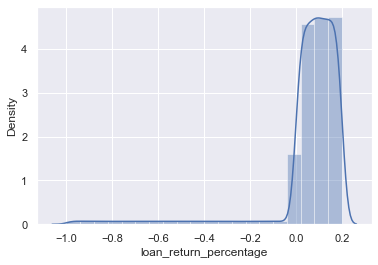

In [16]:
a=sns.distplot(df['loan_return_percentage'], bins=20)

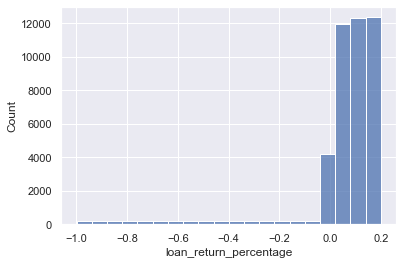

In [17]:
ax = sns.histplot(df['loan_return_percentage'], bins=20)

# Scatterplot of how fico score affects loan return percentage in all categories

In [139]:
sns.scatterplot(x="loan_return_percentage", y="fico_score", hue='category', data=df)

<AxesSubplot:xlabel='loan_return_percentage', ylabel='fico_score'>

The scatter plot depicts furniture being the category with higher fico score and also with a higher rate of return in loan percentage. Orange color has dominated to top right corner.

# How does down payment affect the length of the time in months?

In [140]:
sns.scatterplot(x="down_payment_amount", y="loan_length_months", data=df)

<AxesSubplot:xlabel='down_payment_amount', ylabel='loan_length_months'>

We can see from the above scatter plot that, there is no signifiant correlation but rater a slight one between down payment amount and loan length amount. This was to show whether poeple with larger down payment takes few time to finsih their loan payment.It shows alot more people with lesser down payment take much longer time than people with larger down payment

# Scatterplot of how apr affects down payment percentage

<AxesSubplot:xlabel='down_payment_amount', ylabel='apr'>

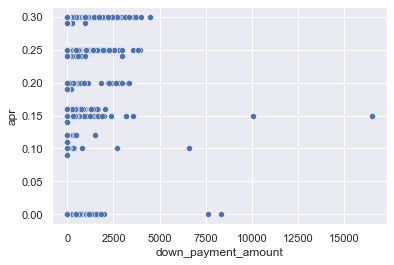

In [141]:
sns.scatterplot(x="down_payment_amount", y="apr", data=df)

This scatter plots shows more poeple with higher APR making less down payment. There is a few also making very larger down payment with a low or moderate APR.

# Using boxplot to visualize the loan return percentage in all categories

In [142]:
sns.boxplot(y="loan_return_percentage", x="category", data=df)

<AxesSubplot:xlabel='category', ylabel='loan_return_percentage'>

The above shows about similar loan return percentage but jewelry seems to have some outliers that none of the other categories doesnt have.

In [143]:
null_rows = df [df.isnull().any(axis=1)]
null_rows.head(5)

merchant_id         user_id       checkout_id   checkout_date  \
310   LWGKASO1U9UXFLAJ  9038-8312-TJOQ  MXAM4UQ215IG6JLQ  3/27/2016 0:00   
589   LWGKASO1U9UXFLAJ  5597-4447-AGCH  7E38S2PTC4JSXBT3  3/28/2016 0:00   
6442  LWGKASO1U9UXFLAJ  0547-2789-IKAI  K0168A5YODQ78UUR  3/29/2016 0:00   
6719  LWGKASO1U9UXFLAJ  5543-8097-DOTC  KCKEJFIEKXA0SXYR  3/22/2016 0:00   
7436  LWGKASO1U9UXFLAJ  3468-6661-NDWR  8HKUY6JQ68TKFMO2  3/28/2016 0:00   

      loan_amount  down_payment_amount users_first_capture  user_dob_year  \
310         999.0                  0.0                   0           1991   
589        1398.0                  0.0                   0           1973   
6442        999.0                  0.0                   0           1984   
6719        999.0                  0.0                   0           1980   
7436       1299.0                  0.0                   0           1963   

      loan_length_months    mdr     apr  fico_score  loan_return_percentage  \
310                   12  0.035  0.2999         657                  0.0177   
589                    3  0.035  0.1100         682                  0.1520   
6442                   6  0.035  0.2400         668                  0.1326   
6719                  12  0.035  0.3000         628                  0.1348   
7436                  12  0.035  0.2900         651                  0.0688   

     merchant_name category  
310            NaN      NaN  
589            NaN      NaN  
6442           NaN      NaN  
6719           NaN      NaN  
7436           NaN      NaN

In [144]:
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 310 to 42370
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   merchant_id             35 non-null     object 
 1   user_id                 35 non-null     object 
 2   checkout_id             35 non-null     object 
 3   checkout_date           35 non-null     object 
 4   loan_amount             35 non-null     float64
 5   down_payment_amount     35 non-null     float64
 6   users_first_capture     35 non-null     object 
 7   user_dob_year           35 non-null     int64  
 8   loan_length_months      35 non-null     int64  
 9   mdr                     35 non-null     float64
 10  apr                     35 non-null     float64
 11  fico_score              35 non-null     int64  
 12  loan_return_percentage  35 non-null     float64
 13  merchant_name           0 non-null      object 
 14  category                0 non-null     

# All the nulls are filled with zero

In [145]:
zero_filled = null_rows.fillna(0)
zero_filled.head(5)

merchant_id         user_id       checkout_id   checkout_date  \
310   LWGKASO1U9UXFLAJ  9038-8312-TJOQ  MXAM4UQ215IG6JLQ  3/27/2016 0:00   
589   LWGKASO1U9UXFLAJ  5597-4447-AGCH  7E38S2PTC4JSXBT3  3/28/2016 0:00   
6442  LWGKASO1U9UXFLAJ  0547-2789-IKAI  K0168A5YODQ78UUR  3/29/2016 0:00   
6719  LWGKASO1U9UXFLAJ  5543-8097-DOTC  KCKEJFIEKXA0SXYR  3/22/2016 0:00   
7436  LWGKASO1U9UXFLAJ  3468-6661-NDWR  8HKUY6JQ68TKFMO2  3/28/2016 0:00   

      loan_amount  down_payment_amount users_first_capture  user_dob_year  \
310         999.0                  0.0                   0           1991   
589        1398.0                  0.0                   0           1973   
6442        999.0                  0.0                   0           1984   
6719        999.0                  0.0                   0           1980   
7436       1299.0                  0.0                   0           1963   

      loan_length_months    mdr     apr  fico_score  loan_return_percentage  \
310                   12  0.035  0.2999         657                  0.0177   
589                    3  0.035  0.1100         682                  0.1520   
6442                   6  0.035  0.2400         668                  0.1326   
6719                  12  0.035  0.3000         628                  0.1348   
7436                  12  0.035  0.2900         651                  0.0688   

      merchant_name  category  
310               0         0  
589               0         0  
6442              0         0  
6719              0         0  
7436              0         0

# Is there any correlation between down payment amount and loan return percenatge

In [146]:
df[['down_payment_amount', 'loan_return_percentage']].corr()

down_payment_amount  loan_return_percentage
down_payment_amount                1.000000                0.004479
loan_return_percentage             0.004479                1.000000

The mini table above shows there is no correlation between down payment and loan return percentage

In [147]:
# Print the original size of the DataFrame
print(df.size)
#Drop NaN rows
clean_df = df.dropna()
#Print the size of the modified DataFrame
print(clean_df.size)

655305
654780


In [148]:
def series_statistics(column):
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

In [149]:
series_statistics(clean_df[ 'loan_return_percentage'])

statistics for column: loan_return_percentage
The max value in the column: 0.2
The min value in the column: -0.9998
The mode value in the column: 0    0.037
dtype: float64
The median value in the column: 0.0936
The mean of the column: 0.06039341840007349
The std of the column: 0.1771886693849509


In [150]:
series_statistics(clean_df[ 'apr'])

statistics for column: apr
The max value in the column: 0.3
The min value in the column: 0.0
The mode value in the column: 0    0.3
dtype: float64
The median value in the column: 0.25
The mean of the column: 0.1951123087144036
The std of the column: 0.12351626032888731


In [151]:
clean_df['loan_return_percentage'].describe()

count    43652.000000
mean         0.060393
std          0.177189
min         -0.999800
25%          0.039800
50%          0.093600
75%          0.147200
max          0.200000
Name: loan_return_percentage, dtype: float64

In [152]:
clean_df['apr'].describe()

count    43652.000000
mean         0.195112
std          0.123516
min          0.000000
25%          0.000000
50%          0.250000
75%          0.300000
max          0.300000
Name: apr, dtype: float64

In [153]:
clean_df[['loan_return_percentage', 'apr', 'down_payment_amount']].describe()

loan_return_percentage           apr  down_payment_amount
count            43652.000000  43652.000000         43652.000000
mean                 0.060393      0.195112            25.052114
std                  0.177189      0.123516           184.847327
min                 -0.999800      0.000000             0.000000
25%                  0.039800      0.000000             0.000000
50%                  0.093600      0.250000             0.000000
75%                  0.147200      0.300000             0.000000
max                  0.200000      0.300000         16520.000000

# Correlation between loan return percentage and the down payment

In [154]:
stats.pearsonr(df['loan_return_percentage'], df['down_payment_amount'])

(0.004478633321981921, 0.34923377159964464)

# Correlation between loan return percentage and Apr.

In [155]:
stats.pearsonr(df['loan_return_percentage'], df['apr'])

(0.0013001136000451673, 0.7858259849643052)

With the above p-value it shows there is no signifcant correlation between APR and the loan return percentage.

In [156]:
furniture = df.iloc[(df['category'] == 'furniture').values]
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   merchant_id             0 non-null      object 
 1   user_id                 0 non-null      object 
 2   checkout_id             0 non-null      object 
 3   checkout_date           0 non-null      object 
 4   loan_amount             0 non-null      float64
 5   down_payment_amount     0 non-null      float64
 6   users_first_capture     0 non-null      object 
 7   user_dob_year           0 non-null      int64  
 8   loan_length_months      0 non-null      int64  
 9   mdr                     0 non-null      float64
 10  apr                     0 non-null      float64
 11  fico_score              0 non-null      int64  
 12  loan_return_percentage  0 non-null      float64
 13  merchant_name           0 non-null      object 
 14  category                0 non-null      object 
dtypes

In [157]:
jewelry = df.iloc[(df['category'] == 'jewelry').values]
jewelry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   merchant_id             0 non-null      object 
 1   user_id                 0 non-null      object 
 2   checkout_id             0 non-null      object 
 3   checkout_date           0 non-null      object 
 4   loan_amount             0 non-null      float64
 5   down_payment_amount     0 non-null      float64
 6   users_first_capture     0 non-null      object 
 7   user_dob_year           0 non-null      int64  
 8   loan_length_months      0 non-null      int64  
 9   mdr                     0 non-null      float64
 10  apr                     0 non-null      float64
 11  fico_score              0 non-null      int64  
 12  loan_return_percentage  0 non-null      float64
 13  merchant_name           0 non-null      object 
 14  category                0 non-null      object 
dtypes

# Using t-test to find the significant difference of loan return percentage between furniture and jewelry.

In [179]:
df5 = df.loc[df['category'] == 'Furniture']
df6 = df.loc[df['category'] == 'Jewelry']

In [180]:
(t, p) = stats.ttest_ind(df5['loan_return_percentage'], df6['loan_return_percentage']) 
print(p)

0.5440703830544933


According to the p-value at .5440 I failed to reject the null hypothesis, therefore there is a significant difference between the two groups which is Furniture and Jewelry.

In [181]:
tt=df.groupby('merchant_name', sort=False).mean()
a=tt.sort_index( ascending=False)
a

loan_amount  down_payment_amount  user_dob_year  \
merchant_name                                                            
Swiss & Co.            2546.208569            49.000964    1972.475177   
Roquefort NYC           453.286184            15.203195    1975.856954   
Pepperjack Co.          888.336945             9.714471    1977.179552   
Parmesan, LLC          4172.867291           216.859827    1971.487032   
Mozzarella Factory      853.512246             9.556769    1973.058462   
Monterey Jack Sparrow   812.712625            17.410095    1982.649165   
Halloumi Boards        1391.042775            56.831410    1982.158590   
Goat, LLC               996.364760            62.242434    1974.164915   
Feta R Us               400.000000             0.000000    1981.000000   
Cottage Company        1682.231163            24.348837    1974.023256   
Cheddar Inc.            492.188950            22.369812    1973.999597   
Brie Corp.              701.420705            23.597725    1976.273605   
Blue Steel              175.333333            10.800000    1977.000000   
Bagels & Cream          155.661268             5.188336    1985.388787   
American Inc.          9420.000000             0.000000    1969.750000   

                       loan_length_months       mdr       apr  fico_score  \
merchant_name                                                               
Swiss & Co.                     11.559449  0.095166  0.007063  714.943262   
Roquefort NYC                   11.404489  0.029000  0.262315  639.793574   
Pepperjack Co.                   6.000000  0.060523  0.000000  668.502937   
Parmesan, LLC                   10.746398  0.024254  0.219270  693.190202   
Mozzarella Factory               7.163077  0.098363  0.067163  614.495385   
Monterey Jack Sparrow           10.124105  0.029000  0.262694  627.420048   
Halloumi Boards                  9.779736  0.033053  0.222990  688.127753   
Goat, LLC                        9.489816  0.025000  0.260762  642.706965   
Feta R Us                       12.000000  0.000000  0.300000  639.000000   
Cottage Company                 10.186047  0.000000  0.252558  673.000000   
Cheddar Inc.                     8.933671  0.019000  0.260621  640.769995   
Brie Corp.                      10.431330  0.018000  0.261288  636.647711   
Blue Steel                      12.000000  0.000000  0.253333  584.000000   
Bagels & Cream                   7.261029  0.019000  0.262337  603.749081   
American Inc.                   10.500000  0.030000  0.200000  715.750000   

                       loan_return_percentage  
merchant_name                                  
Swiss & Co.                          0.063590  
Roquefort NYC                        0.060482  
Pepperjack Co.                       0.059155  
Parmesan, LLC                        0.053688  
Mozzarella Factory                   0.068753  
Monterey Jack Sparrow                0.051861  
Halloumi Boards                      0.057312  
Goat, LLC                            0.062666  
Feta R Us                            0.070500  
Cottage Company                      0.058691  
Cheddar Inc.                         0.059931  
Brie Corp.                           0.062508  
Blue Steel                           0.086700  
Bagels & Cream                       0.063727  
American Inc.                        0.113950

# Using t-test to find the significant diffrence in the loan amount between Roquefort NYC and Brie Corp. 

In [182]:
df1 = df.loc[df['merchant_name'] == 'Roquefort NYC']
df2 = df.loc[df['merchant_name'] == 'Brie Corp.']

In [183]:
(t, p) = stats.ttest_ind(df1['loan_amount'], df2['loan_amount']) 
print(p)

3.0371011373127297e-51


According to the p-value at (3.0371011373127297e-51) I will reject the null hypothesis, therefore there is a significant difference between the two merchants which are Roquefort NYC and Brie Corp.

# Significant difference between the only two merchants that average a zero in the down payment. 

In [ ]:
df1 = df.loc[df['merchant_name'] == 'American Inc.']
df2 = df.loc[df['merchant_name'] == 'Feta R Us']

In [201]:
(t, p) = stats.ttest_ind(df1['loan_return_percentage'], df2['loan_return_percentage']) 
print(p)

0.684144096771323


According to the p-value at 0.6841 I failed to reject the null hypothesis, therefore there is significant difference in the loan return percantge even tho both American Inc. and Feta R Us are the only merchants that average zero in down payments.

# Uing t-test to find the significant difference of loan return percentage between Music and Apparel.

In [116]:
df3 = df.loc[df['category'] == 'Music']
df4 = df.loc[df['category'] == 'Apparel']

In [107]:
(t, p) = stats.ttest_ind(df3['loan_return_percentage'], df4['loan_return_percentage']) 
print(p)

0.666007303126552


According to the p-value at 0.666 I failed to reject the null hypotheis therefore, there is a significant difference between the two groups which is Music and Apparel.

# CONCLUSIONS AND RECOMMENATIONS

I would recommend that, there should be seasonal promotions on jewelries mostly due to the fact that jewelries are the most expensive among the categories.The jewelry ategory had the higest loan amount as their average. There should be a discounts on returning customers that had a ceratin length of time for their previus payment. Which means shorter months would gain you an access to discounts. I aslo was ale to find out dwon payments doesnt affect the return of payment so merchnast shopuld disqulify individuals without a down payment. American Inc had the highest loan return amount percentage but had zero down paymernt amount as an average.